<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Writing_spatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Writing Spatial Data**


Writing the GeoDataFrame to file is straightfoward by following this command:

`GeoDataFrame.to_file`

In [2]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 298 kB/s 
     |████████████████████████████████| 6.3 MB 36.4 MB/s 


In [6]:
states = gpd.read_file('./sample_data/cb_2018_us_state_20m.shp')

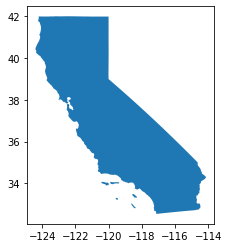

In [7]:
CA = states[states.NAME == 'California']
CA.plot()

Now let us just try and write the california state geometry to a separate shapefile using the `gpd.to_file` operation.

In [8]:
CA.to_file("./sample_data/California_state.shp")

To check if the file has been written correctly, we will read it back from the same path where we wrote it to - in the previous step.

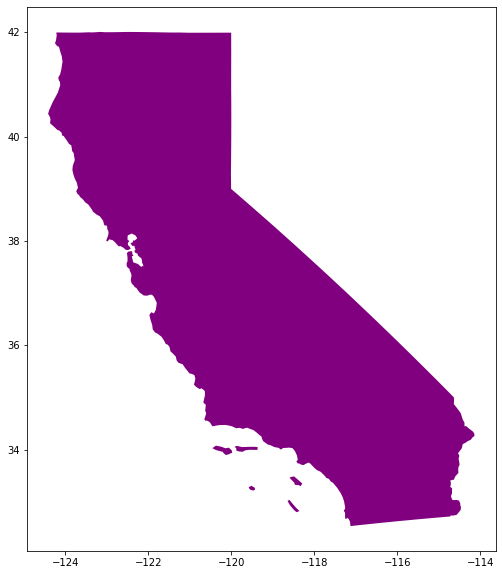

In [9]:
ca_check = gpd.read_file('./sample_data/California_state.shp')
ca_check.plot(figsize=(10,10),color = "purple")

Now lets write another state to a separate shapefile. For example, lets take Alaska.

In [10]:
Alaska = states[states.NAME == 'Alaska']
Alaska.to_file('./sample_data/Alaska_state.shp')

Now read it back and try to plot it again.

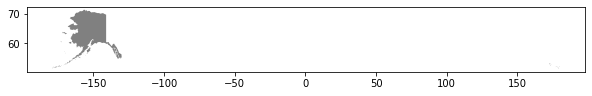

In [11]:
alaska_check = gpd.read_file('./sample_data/Alaska_state.shp')
alaska_check.plot(figsize = (10,10), color = "grey")

Let us try to calculate the area of each state using the `Geopandas.geometry.area` property. This function will give you the area as a numeric variable and you can store it in a new column `Area`.

In [13]:
states['Area'] = states.geometry.area
states.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Area
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",2.865091
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",15.848949
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",0.553716
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",11.332121
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",12.537439


You can see a new column `Area` has been added to the `states` Geodataframe. We will now try to extract the state with the smallest area and write it to a new shapefile.

In [15]:
min_area = states.Area.min()

The `min()` funciton picks the smallest value from a Geoseries.

In [16]:
min_area

0.01858035942600216

Now lets filter the GeoDataFrame so as to pick the state whose `Area` is equal to the `min_area` value.

In [17]:
smallest_state = states[states.Area == min_area]
smallest_state

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Area
36,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.04102 38.995...",0.01858


In [18]:
smallest_state.to_file('./sample_data/DC_state.shp')

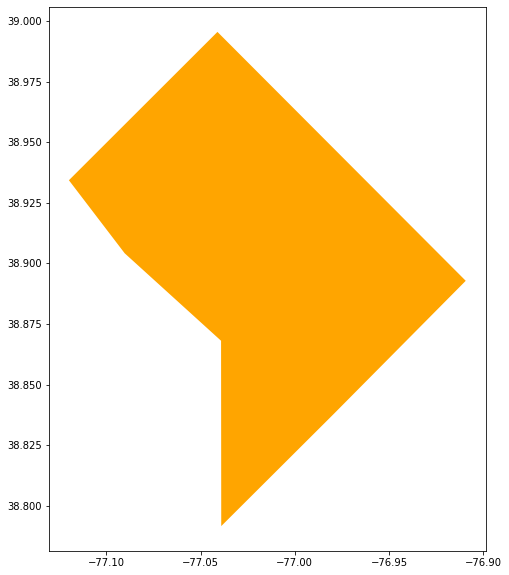

In [19]:
DC = gpd.read_file('./sample_data/DC_state.shp')
DC.plot(figsize = (10,10), color = 'orange')